# Reshaping the Images and Annotations

The images provided were of higher quality. The images and the annotations were resized to 512x512 for Segformer training and 640x640 for YOLOv8 training. The resizing code was provided along with the dataset itself.


In [2]:
# !pip install scikit-image
# !pip install shapely

In [1]:
import os
from dacl10k import utils
from dacl10k.dacl10kdataset import Dacl10kDataset

c:\aryan\Cracks\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data Exploration

In [2]:
split = "validation" # "train"
path_to_data = "C:/Users/vravula/Downloads/Cracks/data/dacl10k_v2_devphase/"
dataset = Dacl10kDataset(split, path_to_data, resize_mask=(512, 512), resize_img=(512, 512), normalize_img=True)

#> (torch.Size([3, 512, 512]), torch.Size([19, 512, 512]))

Found 975 annotation_files in folder C:/Users/vravula/Downloads/Cracks/data/dacl10k_v2_devphase//annotations/validation
Found 975 image_files in folder C:/Users/vravula/Downloads/Cracks/data/dacl10k_v2_devphase//images/validation


Create internal df:   0%|          | 0/975 [00:00<?, ?it/s]

Create internal df: 100%|██████████| 975/975 [00:00<00:00, 1066.20it/s]

DataFrame is stored in `self.df`.


In [3]:
img, mask = dataset[10]
img.shape, mask.shape

(torch.Size([3, 512, 512]), torch.Size([19, 512, 512]))

In [4]:
# Getting the list of target classes in the dataset

target_list = dataset.TARGET_LIST
target_list

['Crack',
 'ACrack',
 'Wetspot',
 'Efflorescence',
 'Rust',
 'Rockpocket',
 'Hollowareas',
 'Cavity',
 'Spalling',
 'Graffiti',
 'Weathering',
 'Restformwork',
 'ExposedRebars',
 'Bearing',
 'EJoint',
 'Drainage',
 'PEquipment',
 'JTape',
 'WConccor']

In [10]:
image_file = "C:/Users/vravula/Downloads/Cracks/data/dacl10k_v2_devphase/resized/data/images/validation/dacl10k_v2_validation_0320.jpg"
annotation_file = "C:/Users/vravula/Downloads/Cracks/data/dacl10k_v2_devphase/resized/data/annotations_json/validation/dacl10k_v2_validation_0320.json"

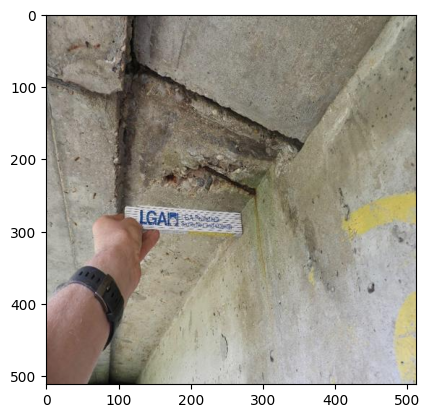

In [15]:
import matplotlib.pyplot as plt
from PIL import Image

# Create map from target name to index. In this example we are interested in `Drainage`.
target_dict = dict(zip(utils.TARGET_LIST, range(len(utils.TARGET_LIST))))
target_of_interest = target_dict["Cavity"]

# Display image
img = Image.open(image_file)
# img.close()
plt.imshow(img)
plt.show()

In [16]:
target_dict

{'Crack': 0,
 'ACrack': 1,
 'Wetspot': 2,
 'Efflorescence': 3,
 'Rust': 4,
 'Rockpocket': 5,
 'Hollowareas': 6,
 'Cavity': 7,
 'Spalling': 8,
 'Graffiti': 9,
 'Weathering': 10,
 'Restformwork': 11,
 'ExposedRebars': 12,
 'Bearing': 13,
 'EJoint': 14,
 'Drainage': 15,
 'PEquipment': 16,
 'JTape': 17,
 'WConccor': 18}

In [17]:
target_of_interest

7

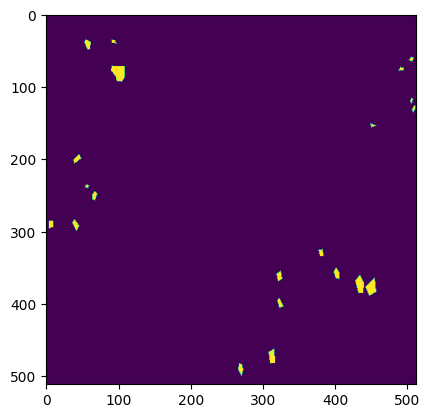

In [18]:
# Getting the groundtruth for required images
# Apply labelme2mask transforms
mask = utils.labelme2mask(annotation_file)
mask.shape, type(mask)
#> ((960, 1280, 19), numpy.ndarray)
plt.imshow(mask[:, :, target_of_interest])
plt.show()

In [137]:
# For debugging

# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming 'mask' is your image data with 19 channels
# for channel in range(19):
#     plt.subplot(5, 4, channel+1)  # Create subplots for each channel
#     plt.imshow(mask[:, :, channel])  # Display each channel
#     plt.title(f'Channel {channel+1}')

# plt.tight_layout()
# plt.show()


In [138]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `mask` is the multi-class mask with shape (512, 512, 19)

# Define the number of classes
num_classes = mask.shape[2]

# Define RGB colors for each of the 19 classes
class_colors = [
    (255, 0, 0),     # Class 0: Red
    (0, 255, 0),     # Class 1: Green
    (0, 0, 255),     # Class 2: Blue
    (255, 255, 0),   # Class 3: Yellow
    (255, 0, 255),   # Class 4: Magenta
    (0, 255, 255),   # Class 5: Cyan
    (128, 0, 0),     # Class 6: Maroon
    (0, 128, 0),     # Class 7: Green
    (0, 0, 128),     # Class 8: Navy
    (128, 128, 0),   # Class 9: Olive
    (128, 0, 128),   # Class 10: Purple
    (0, 128, 128),   # Class 11: Teal
    (192, 192, 192), # Class 12: Silver
    (128, 128, 128), # Class 13: Gray
    (255, 165, 0),   # Class 14: Orange
    (128, 0, 64),    # Class 15: Burgundy
    (255, 128, 0),   # Class 16: Orange-red
    (0, 128, 64),    # Class 17: Dark Green
    (128, 64, 0)     # Class 18: Brown
]

# Create an empty array for the composite image
composite_mask = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)


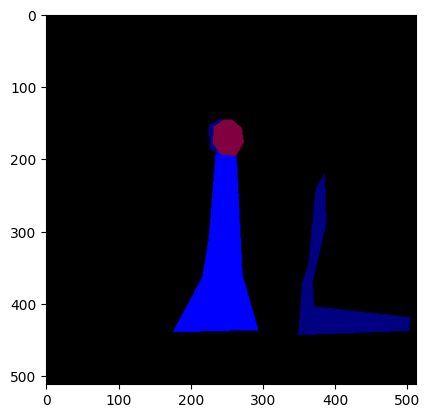

In [139]:
# Getting all the classes present in the annotation into a single mask
# Populate the composite image with class colors
for class_index in range(num_classes):
    class_mask = mask[:, :, class_index]
    class_color = class_colors[class_index]
    composite_mask[class_mask > 0] = class_color

# Display the composite image
plt.imshow(composite_mask)
# plt.axis('off')
plt.show()

## Reshaping the images and annotations

### For Segformer

In [35]:
os.makedirs("C:/Users/vravula/Downloads/Cracks/data/dacl10k_v2_devphase/resized/data/images/validation")
os.makedirs("C:/Users/vravula/Downloads/Cracks/data/dacl10k_v2_devphase/resized/data/annotations/validation")
os.makedirs("C:/Users/vravula/Downloads/Cracks/data/dacl10k_v2_devphase/resized/data/images/train")
os.makedirs("C:/Users/vravula/Downloads/Cracks/data/dacl10k_v2_devphase/resized/data/annotations/train")


In [39]:
# Resize images
source_folder = "C:/Users/vravula/Downloads/Cracks/data/dacl10k_v2_devphase/images/train"
target_folder = "C:/Users/vravula/Downloads/Cracks/data/dacl10k_v2_devphase/resized/data/images/train"
utils.resize_images(source_folder, target_folder, size=(512,512))

# Resize annotations (in JSON files)
source_folder = "C:/Users/vravula/Downloads/Cracks/data/dacl10k_v2_devphase/annotations/train"
target_folder = "C:/Users/vravula/Downloads/Cracks/data/dacl10k_v2_devphase/resized/data/annotations/train"
utils.resize_annotations(source_folder, target_folder, size=(512,512))

100%|██████████| 6935/6935 [03:41<00:00, 31.26it/s] 


Resized images saved in C:/Users/vravula/Downloads/Cracks/data/dacl10k_v2_devphase/resized/data/images/train


100%|██████████| 6935/6935 [00:10<00:00, 683.32it/s]


In [37]:
# Resize images
source_folder = "C:/Users/vravula/Downloads/Cracks/data/dacl10k_v2_devphase/images/validation"
target_folder = "C:/Users/vravula/Downloads/Cracks/data/dacl10k_v2_devphase/resized/data/images/validation"
utils.resize_images(source_folder, target_folder, size=(512,512))

# Resize annotations (in JSON files)
source_folder = "C:/Users/vravula/Downloads/Cracks/data/dacl10k_v2_devphase/annotations/validation"
target_folder = "C:/Users/vravula/Downloads/Cracks/data/dacl10k_v2_devphase/resized/data/annotations/validation"
utils.resize_annotations(source_folder, target_folder, size=(512,512))

100%|██████████| 975/975 [00:25<00:00, 38.15it/s]


Resized images saved in C:/Users/vravula/Downloads/Cracks/data/dacl10k_v2_devphase/resized/data/images/validation


100%|██████████| 975/975 [00:01<00:00, 790.69it/s]


### For YOLOv8

In [5]:
# Resize images
source_folder = "C:/Users/vravula/Downloads/Cracks/data/dacl10k_v2_devphase/images/validation"
target_folder = "C:/aryan/Cracks/data/dacl10k_v2_devphase/resized/640x640/images/validation"
utils.resize_images(source_folder, target_folder, size=(640,640))

# Resize annotations (in JSON files)
source_folder = "C:/Users/vravula/Downloads/Cracks/data/dacl10k_v2_devphase/annotations/validation"
target_folder = "C:/aryan/Cracks/data/dacl10k_v2_devphase/resized/640x640/annotations/validation"
utils.resize_annotations(source_folder, target_folder, size=(640,640))

100%|██████████| 975/975 [00:27<00:00, 34.96it/s]


Resized images saved in C:/aryan/Cracks/data/dacl10k_v2_devphase/resized/640x640/images/validation


100%|██████████| 975/975 [00:01<00:00, 763.68it/s]
